# <font color='green'>Formulários de Referência das Companhias Abertas Listadas pela CVM</font>
# <font color='green'>Autor: Graciliano Márcio Santos Louredo</font>

## <font color='green'>Visualizações gráficas dos resultados</font>

In [1]:
# Carregamento dos pacotes necessários

# Manipulação de dados
import numpy as np
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Ignorar avisos
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# Resposta à pergunta 1: Quais companhias abertas encaminharam os formulários em mais de uma data de referência?
resp1 = pd.read_csv('resultados/resposta-1.csv')

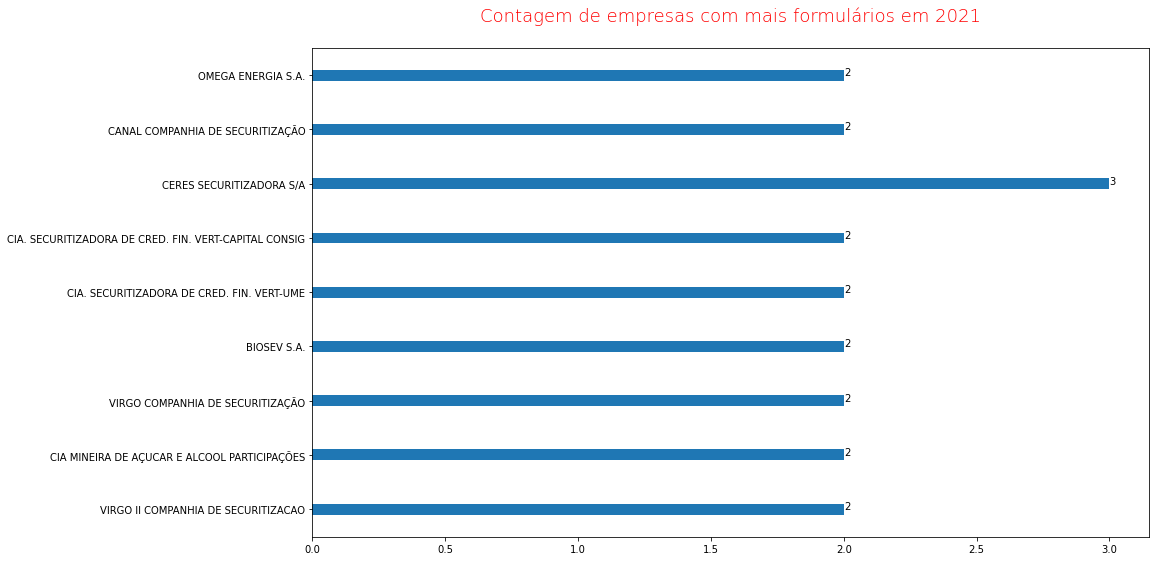

In [5]:
# Visualização das companhias com mais de uma data de referência
larg = 0.2
plt.figure(figsize = (15,9))
plt.barh(resp1.Empresa, resp1.Contagem, larg)
plt.title('Contagem de empresas com mais formulários em 2021\n', fontdict={'fontsize': 18, 'fontweight' : 6, 'color' : 'Red'})
for index, value in enumerate(list(resp1['Contagem'])):
    plt.text((value), index, str(value))
plt.show()

In [6]:
# Resposta à pergunta 2: Dentre as 20 CIAs com mais ações, qual a composição acionária por tipo de investidor e tipo de ação?
resp2 = pd.read_csv('resultados/resposta-2.csv')

In [7]:
# Preparação das quantidades de acionistas agrupados
totacipf = list(resp2.QteAciPF)
totacipj = list(resp2.QteAciPJ)
totacips = [x + y for (x,y) in zip(totacipf,totacipj)]
totaciii = list(resp2.QteAciII)
emp = list(resp2.Empresa)

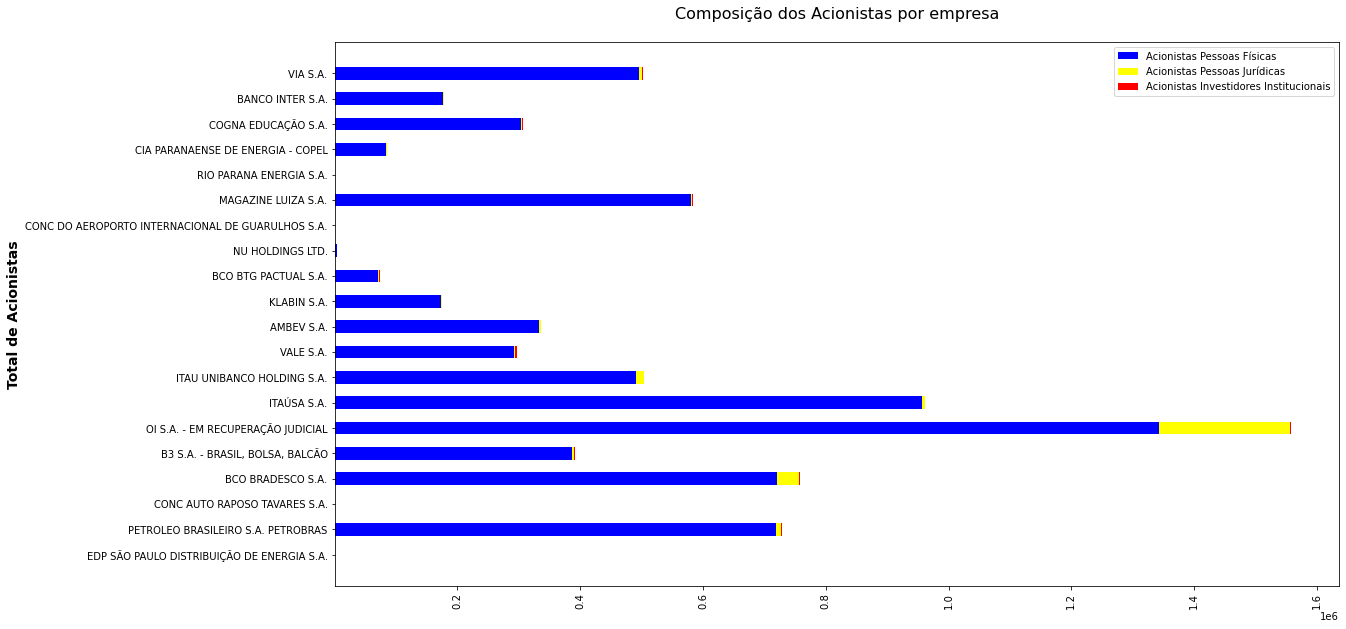

In [9]:
# Visualização da composição dos acionistas
larg = 0.5
fig, ax = plt.subplots(figsize = (18,10))
ax.barh(emp, totacipf, larg, label = 'Acionistas Pessoas Físicas', color = 'blue')
ax.barh(emp, totacipj, larg, left = totacipf, label = 'Acionistas Pessoas Jurídicas', color = 'yellow')
ax.barh(emp, totaciii, larg, left = totacips, label = 'Acionistas Investidores Institucionais', color = 'red')
ax.set_ylabel('Total de Acionistas', fontsize = 14, fontweight = 'bold')
ax.legend()
ax.set_title('Composição dos Acionistas por empresa\n', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

In [10]:
# Preparação das quantidades de ações agrupadas
totacoon = list(resp2.QteAcoON)
totacopn = list(resp2.QteAcoPN)
totaco = [x + y for (x,y) in zip(totacoon,totacopn)]
percacoon = [x / y * 100 for (x,y) in zip(totacoon,totaco)]
percacopn = [x / y * 100 for (x,y) in zip(totacopn,totaco)]

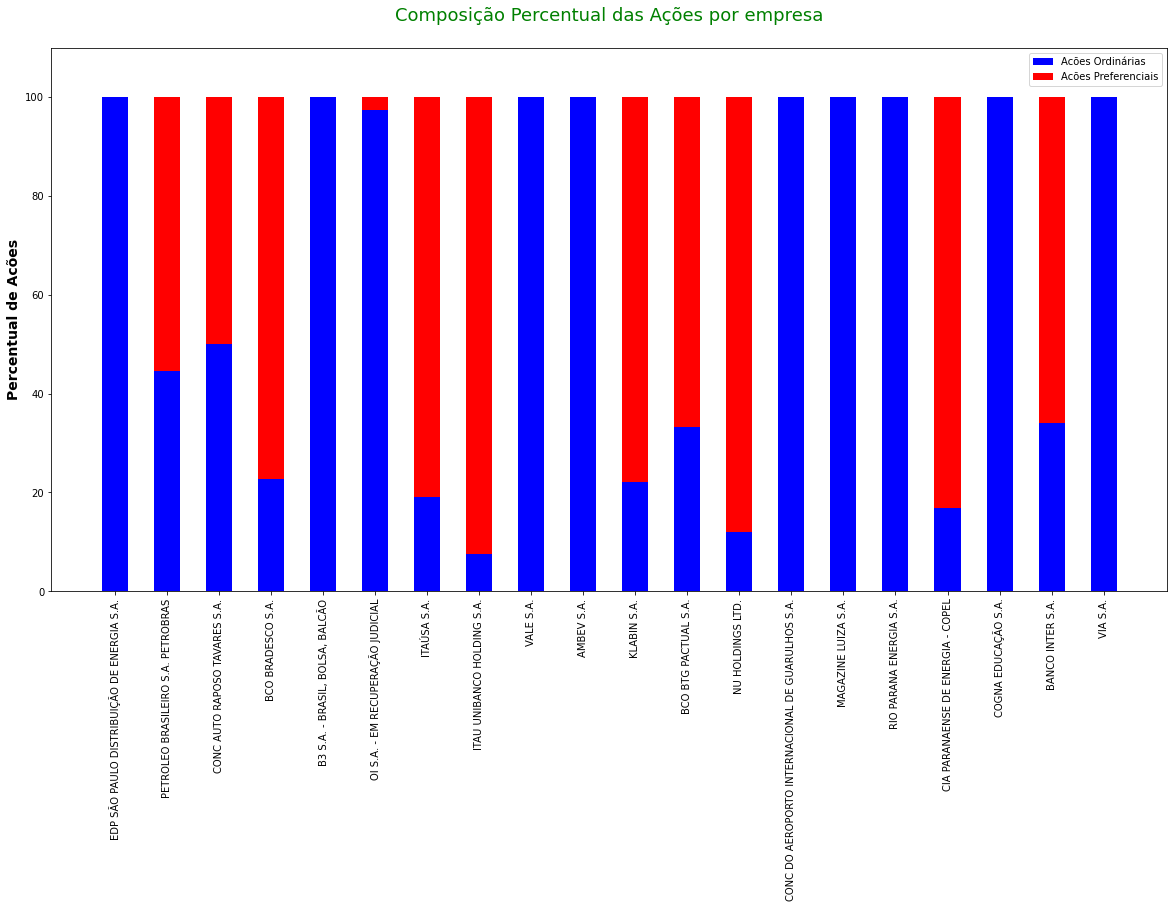

In [14]:
# Visualização da composição percentual das ações
larg = 0.5
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(emp, percacoon, larg, label = 'Acões Ordinárias', color = 'blue')
ax.bar(emp, percacopn, larg, bottom = percacoon, label = 'Acões Preferenciais', color = 'red')
ax.set_ylabel('Percentual de Acões', fontsize = 14, fontweight = 'bold')
ax.legend()
ax.set_title('Composição Percentual das Ações por empresa\n', fontdict = {'fontsize': 18, 'color': 'Green'})
plt.xticks(rotation = 90)
plt.ylim(0,110)
plt.show()

In [15]:
# Resposta à pergunta 3: Nas mesmas 20 maiores CIAs, como se relacionam as remunerações dos ocupantes dos cargos de governança?
resp3 = pd.read_csv('resultados/resposta-3.csv')

In [16]:
# Preparação das medidas de salário médio
salmedadm = resp3.Remuneracao_Adm / resp3.Remunerados_Adm    
salmedadm = pd.Series([0 if np.isnan(x) else x for x in salmedadm])
salmedfis = resp3.Remuneracao_Fis / resp3.Remunerados_Fis
salmedfis = pd.Series([0 if np.isnan(x) else x for x in salmedfis])
salmeddir = resp3.Remuneracao_Dir / resp3.Remunerados_Dir
salmeddir = pd.Series([0 if np.isnan(x) else x for x in salmeddir])
salmed = pd.DataFrame({'SalMedAdm': salmedadm, 'SalMedFis': salmedfis, 'SalMedDir': salmeddir})

<AxesSubplot:title={'center':'Correlação entre as Remunerações dos Dirigentes\n'}>

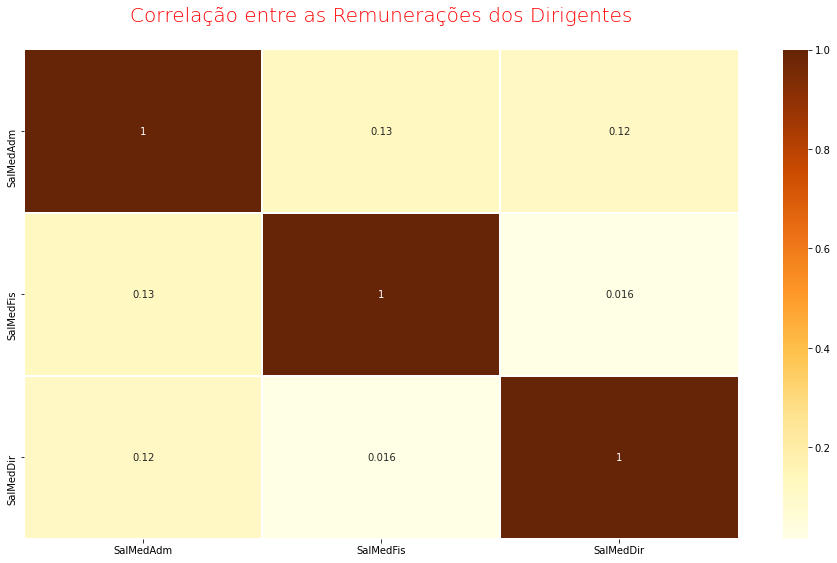

In [17]:
# Visualização da correlação entre as remunerações dos dirigentes nas 20 companhias com mais ações

# Correlação entre as remunerações médias usando o método de Pearson
remf = salmed.corr(method = 'pearson')

# Visualiza da correlação em mapa de calor
plt.figure(figsize = (16,9)) 
plt.title('Correlação entre as Remunerações dos Dirigentes\n', fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

sns.heatmap(remf, xticklabels = remf.columns, yticklabels = remf.columns, cmap = 'YlOrBr', annot = True, linewidth = 0.8)

In [18]:
# Resposta à pergunta 4: Considerando as CIAs com maior número ações (até um máximo de 20), para cada tipo de relação existente,
#quantos foram os cargos diferentes ocupados pelas pessoas relacionadas?
resp4 = pd.read_csv('resultados/resposta-4.csv')

In [19]:
# Preparação das quantidades de cargos por tipo de relação
carsub = list(resp4.Cargos_Subordinacao)
carcon = list(resp4.Cargos_Controle)
hiecar = [x + y for (x,y) in zip(carsub,carcon)]
carser = list(resp4.Cargos_Servicos)

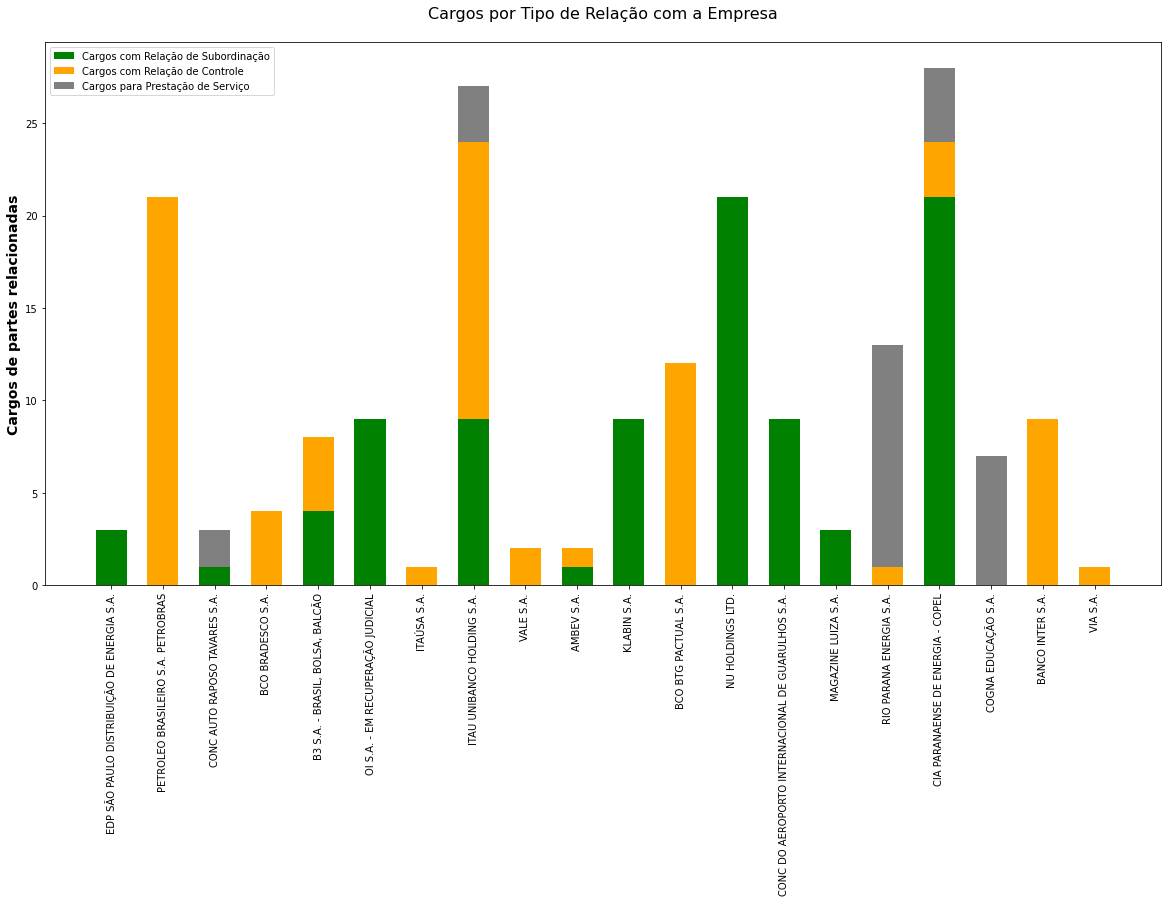

In [21]:
# Visualização da quantidade de cargos ocupados por tipo de relação nas empresas
larg = 0.6
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(emp, carsub, larg, label = 'Cargos com Relação de Subordinação', color = 'green')
ax.bar(emp, carcon, larg, bottom = carsub, label = 'Cargos com Relação de Controle', color = 'orange')
ax.bar(emp, carser, larg, bottom = hiecar, label = 'Cargos para Prestação de Serviço', color = 'gray')
ax.set_ylabel('Cargos de partes relacionadas', fontsize = 14, fontweight = 'bold')
ax.legend()
ax.set_title('Cargos por Tipo de Relação com a Empresa\n', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

##  <font color='green'>Conclusões</font>

Com base na análise realizada, pôde-se constatar padrões marcantes nas empresas brasileiras que enviaram seus formulários de referência para a CVM no ano de 2021.

Entre as <u>companhias que apresentaram mais de um formulário de referência</u>, quase todas pertencem ao **ramo de securitização**. Provavelmente, a natureza sensível das operações desse tipo de negócio, que envolvem dívidas de terceiros, requer maior controle e atualização de dados junto ao órgão regulador.

Em relação à <u>composição acionária das empresas com mais ações negociadas</u>, verifica-se que a grande maioria das ações pertence a pessoas físicas. Por outro, chama a atenção a **forte presença das ações preferenciais entre as da companhia OI S.A.**, o que possivelmente se deve fato de a empresa estar <font color='red'>em recuperação judicial</font>.

Com respeito às <u>remunerações dos dirigentes que ocupam cargos de governança</u> (na diretoria ou nos conselhos fiscal e administrativo), os resultados revelam que elas possuem **fraca correlação positiva entre si**. Dessa forma, não se nota padrão claro de relacionamento entre as remunerações dos altos funcionários nos diferentes órgãos de governança.

No que tange aos <u>cargos ocupados nas empresas</u>, há considerável variedade das categorias de cargos, cuja natureza muda conforme o tipo de relação predominante em cada setor. Por exemplo, nos dados avaliados para as empresas com mais ações, observa-se três características relevantes:<br><br>

<ui>
    <li>predominância de <u>cargos com relação de subordinação</u> nas companhias que atuam como <b>holdings</b> em seu setor;</li><br>
    <li>grande importância dos <u>cargos com relação de controle</u> nas companhias <b>financeiras</b>;</li><br>
    <li>cargos ligados à <u>prestação de serviço</u> com destaque nas companhias dos setores de <b>energia e educação</b>.</li><br>
</ui>
    
Diante dessas considerações, conclui-se que, <u>mesmo entre as empresas mais negociadas em bolsa, existe uma diversidade significativa</u>, a qual demanda análises estratificadas para obter resultados mais contundentes. Por exemplo, o **uso dos setores de atuação das empresas registrados na B3 como estratos pode contribuir para a redução da variabilidade** dos perfis entre as companhias de um mesmo grupo. Com isso, a <font color='red'>identificação de tendências e a realização de predições deve tornar-se mais factível</font>.  